### **Stock Market Prediction using LSTM and Monte Carlo Simulation**

In [10]:
import pandas as pd

In [11]:
df=pd.read_csv('AAPL.csv')

In [89]:

df.columns

Index(['Unnamed: 0', 'symbol', 'close', 'high', 'low', 'open', 'volume',
       'adjClose', 'adjHigh', 'adjLow', 'adjOpen', 'adjVolume', 'divCash',
       'splitFactor'],
      dtype='object')

In [12]:
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [13]:
df.tail()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.96,316.50,310.3241,313.17,33843125,314.96,316.50,310.3241,313.17,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.14,318.52,313.0100,315.03,25432385,313.14,318.52,313.0100,315.03,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.23,319.52,316.2000,316.68,27876215,319.23,319.52,316.2000,316.68,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.85,320.89,315.8700,318.66,25672211,316.85,320.89,315.8700,318.66,25672211,0.0,1.0
1257,1257,AAPL,2020-05-22 00:00:00+00:00,318.89,319.23,315.3500,315.77,20450754,318.89,319.23,315.3500,315.77,20450754,0.0,1.0


In [14]:
df1=df.reset_index()['close']

In [15]:
df1

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

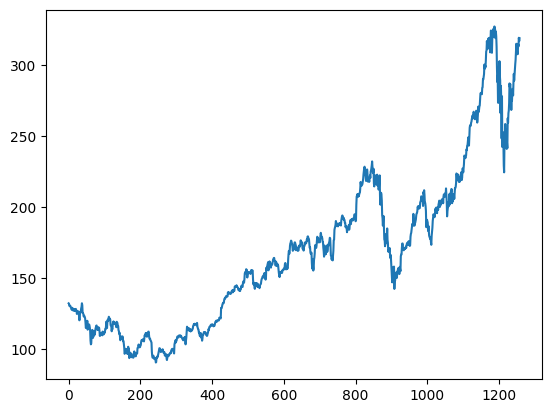

In [16]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [18]:
import numpy as np

In [ ]:
df1

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [104]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [23]:
training_size,test_size

(817, 441)

In [ ]:
train_data

In [126]:
from collections.abc import Sequence
import numpy
# transforming array values into dataset
def create_sequence(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		sq = dataset[i:(i+time_step), 0]
		dataX.append(sq)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [110]:
# reshape x values
time_step = 100
X_train, y_train = create_sequence(train_data, time_step)
X_test, ytest = create_sequence(test_data, time_step)

In [111]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [112]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [113]:
# reshape input, which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [114]:
### Create a LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [115]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [116]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [117]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

In [118]:
import tensorflow as tf

In [119]:
tf.__version__

'2.14.0'

In [120]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 42ms/step


In [121]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [41]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

139.76162276935707

In [42]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

230.72607996545565

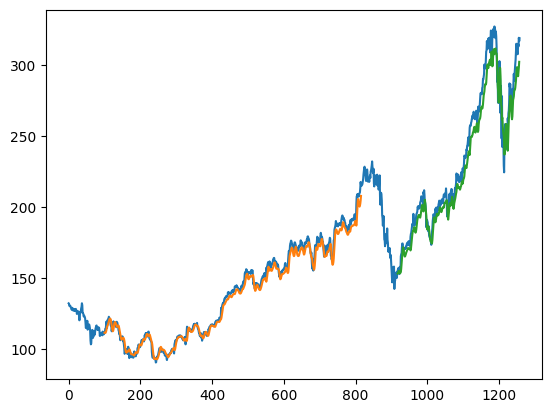

In [43]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [44]:
len(test_data)

441

In [94]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 100)

In [95]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

In [97]:
# 10 days prediction of stocks
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.90465426]
101
1 day input [0.8866419  0.87431394 0.88431985 0.87836697 0.8986321  0.92582116
 0.92877649 0.95676771 0.93869797 0.93304061 0.94950604 0.96424048
 0.95512117 0.95989192 0.96635143 0.96246728 0.92295027 0.9598497
 0.98792536 0.98594106 0.92531453 0.92172591 0.96474711 0.97572406
 0.99159841 0.96972895 0.97614625 0.96795575 1.         0.99016297
 0.99050072 0.96538039 0.98488559 0.97086887 0.94026007 0.87748037
 0.83483915 0.85413324 0.77336823 0.77269273 0.88014017 0.84007431
 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207
 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013 0.65203074
 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757
 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162
 0.71388162 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292
 0.8289707  0.8125475  0.78776492 0.75162543 0.78426074 0.77974331
 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883
 0.85628641 0.87486279 0.88782403 0.

In [98]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [99]:
import matplotlib.pyplot as plt
# len(df1)

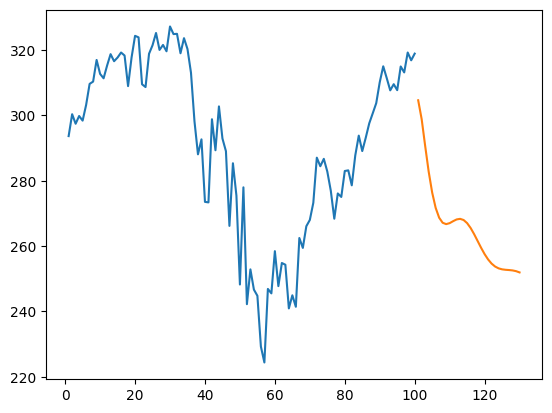

In [100]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

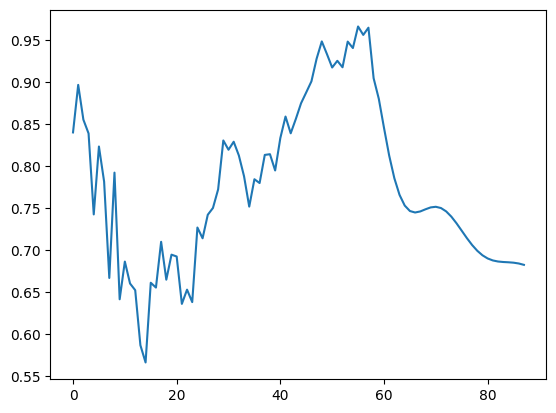

In [101]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [102]:
df3=scaler.inverse_transform(df3).tolist()

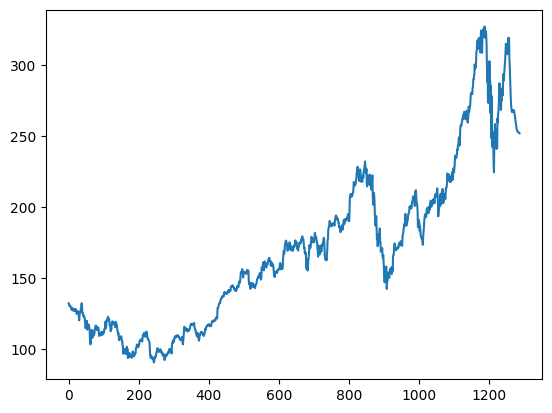

In [103]:
plt.plot(df3)

MCTS

In [132]:

# Read the CSV file
df = pd.read_csv('AAPL.csv')

# Use 'date' as the index and select the 'adjClose' column
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
adj_close = df['adjClose']

# Calculate daily returns
daily_returns = adj_close.pct_change()

# Calculate mean and standard deviation of daily returns
mu = daily_returns.mean()
sigma = daily_returns.std()

# Set up Monte Carlo parameters
num_simulations = 1000
num_days = 10  # Number of trading days in a year

# Initialize an array to store simulation results
simulations = np.zeros((num_simulations, num_days))

# Perform Monte Carlo Simulation
for i in range(num_simulations):
    # Generate random samples from a normal distribution
    daily_returns_sim = np.random.normal(mu, sigma, num_days)

    # Calculate drift term
    drift = mu - 0.5 * sigma**2

    # Calculate simulated prices using the geometric Brownian motion formula
    price_sim = adj_close[-1] * np.exp(np.cumsum(daily_returns_sim))

    # Store the results in the simulations array
    simulations[i, :] = price_sim

# Calculate 95% confidence interval for each day
confidence_interval = np.percentile(simulations, [2.5, 97.5], axis=0)


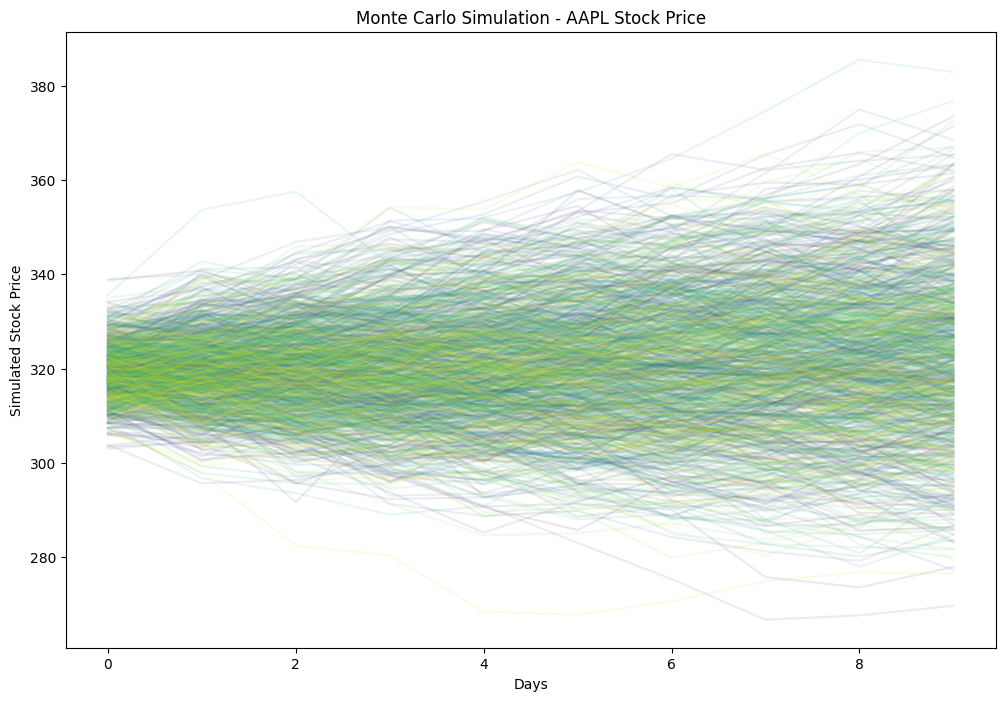

In [133]:
# Plot the Monte Carlo Simulation results with multi-colored lines by using (viridis)
plt.figure(figsize=(12, 8))
cmap = plt.cm.viridis
for i in range(num_simulations):
    plt.plot(simulations[i, :], color=cmap(i / num_simulations), alpha=0.1)

plt.title('Monte Carlo Simulation - AAPL Stock Price')
plt.xlabel('Days')
plt.ylabel('Simulated Stock Price')
plt.show()

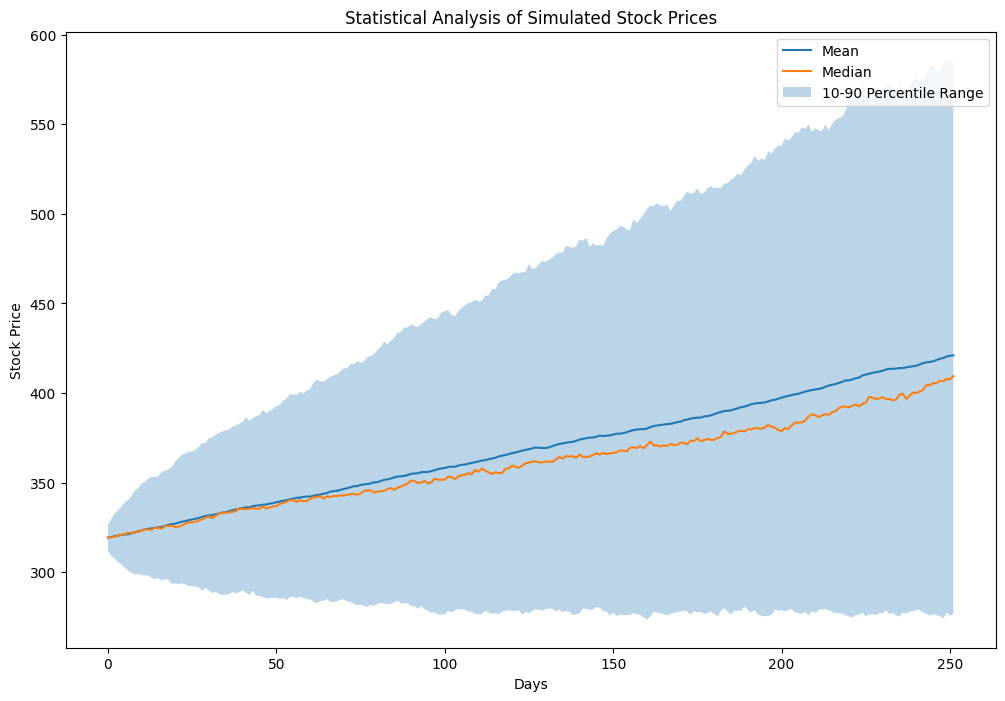

In [70]:
# Statistical Analysis
mean_prices = simulations.mean(axis=0)
median_prices = np.median(simulations, axis=0)
quantiles = np.percentile(simulations, [10, 90], axis=0)


# Plot statistical analysis
plt.figure(figsize=(12, 8))
plt.plot(mean_prices, label='Mean')
plt.plot(median_prices, label='Median')
plt.fill_between(range(num_days), quantiles[0, :], quantiles[1, :], alpha=0.3, label='10-90 Percentile Range')
plt.title('Statistical Analysis of Simulated Stock Prices')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


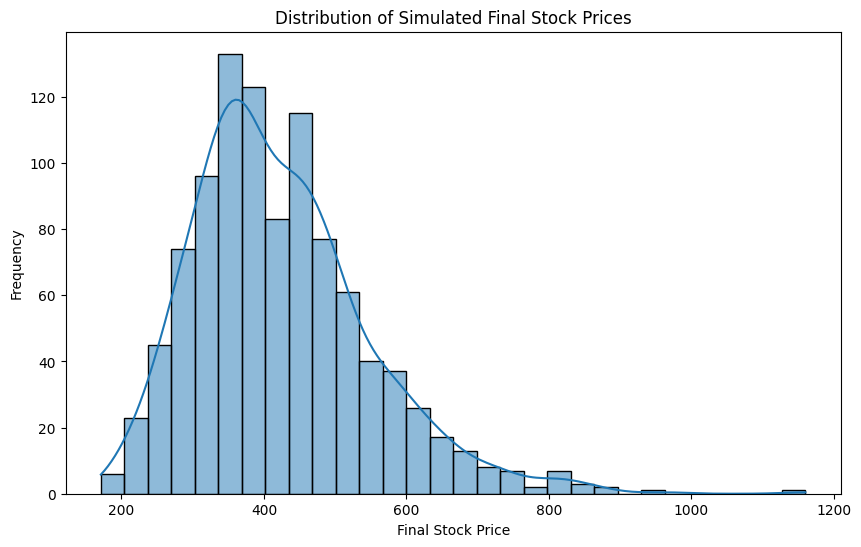

In [59]:

# Distribution plot of the final simulated prices
final_prices = simulations[:, -1]
plt.figure(figsize=(10, 6))
sns.histplot(final_prices, bins=30, kde=True)
plt.title('Distribution of Simulated Final Stock Prices')
plt.xlabel('Final Stock Price')
plt.ylabel('Frequency')
plt.show()


In [138]:

# Risk-Return Analysis
returns = (simulations[:, -1] - adj_close[-1]) / adj_close[-1]
risk = np.percentile(returns, 5)
expected_return = np.mean(returns)

print(f"Expected Return: {expected_return:.4f}")


Expected Return: 0.0125


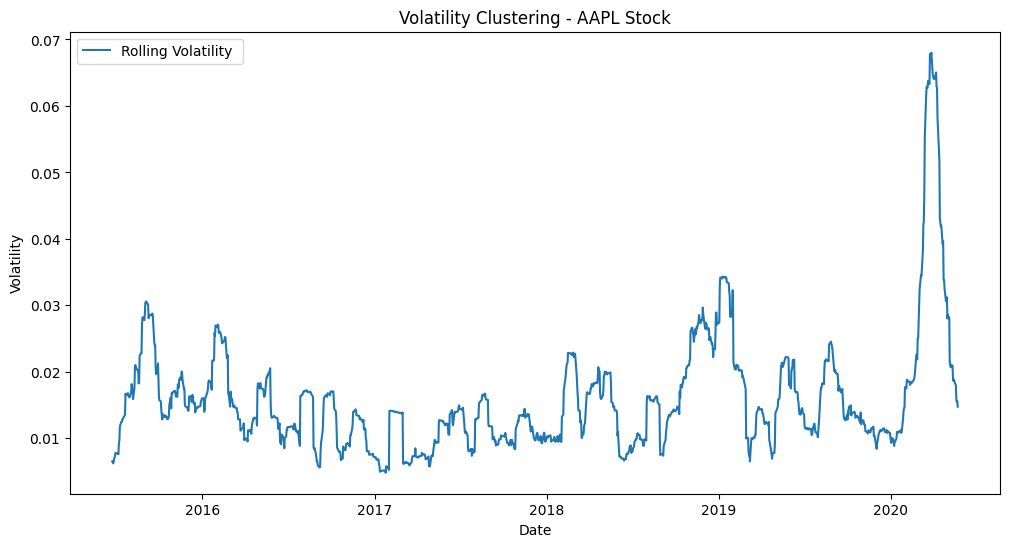

In [137]:

# Volatility Clustering Analysis
rolling_volatility = daily_returns.rolling(window=20).std()
plt.figure(figsize=(12, 6))
plt.plot(rolling_volatility, label='Rolling Volatility ')
plt.title('Volatility Clustering - AAPL Stock')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

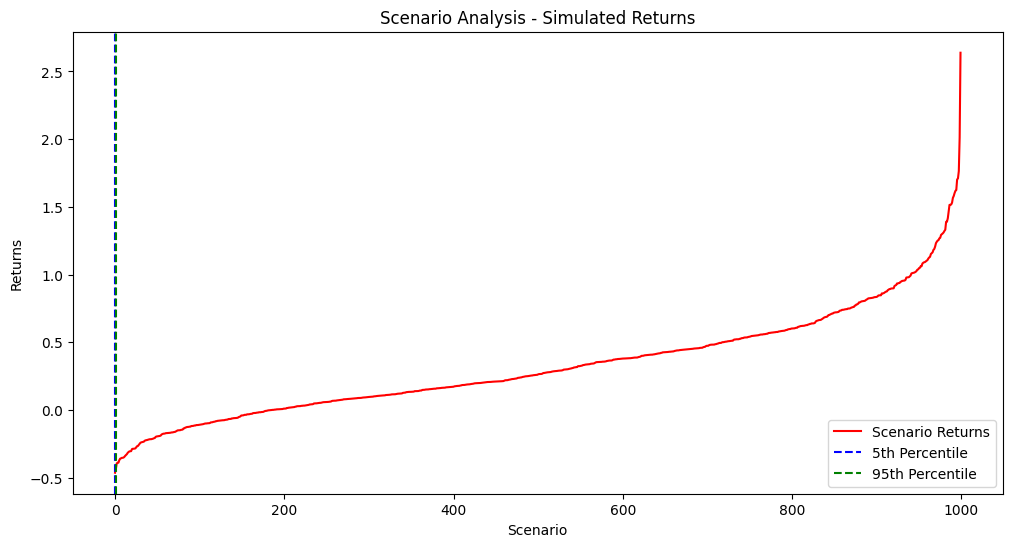

In [62]:
# Scenario Analysis
scenario_returns = simulations[:, -1] / adj_close[-1] - 1
scenario_returns_sorted = np.sort(scenario_returns)

plt.figure(figsize=(12, 6))
plt.plot(scenario_returns_sorted, color='red', label='Scenario Returns')
plt.axvline(np.percentile(scenario_returns, 5), color='blue', linestyle='dashed', label='5th Percentile')
plt.axvline(np.percentile(scenario_returns, 95), color='green', linestyle='dashed', label='95th Percentile')
plt.title('Scenario Analysis - Simulated Returns')
plt.xlabel('Scenario')
plt.ylabel('Returns')
plt.legend()
plt.show()


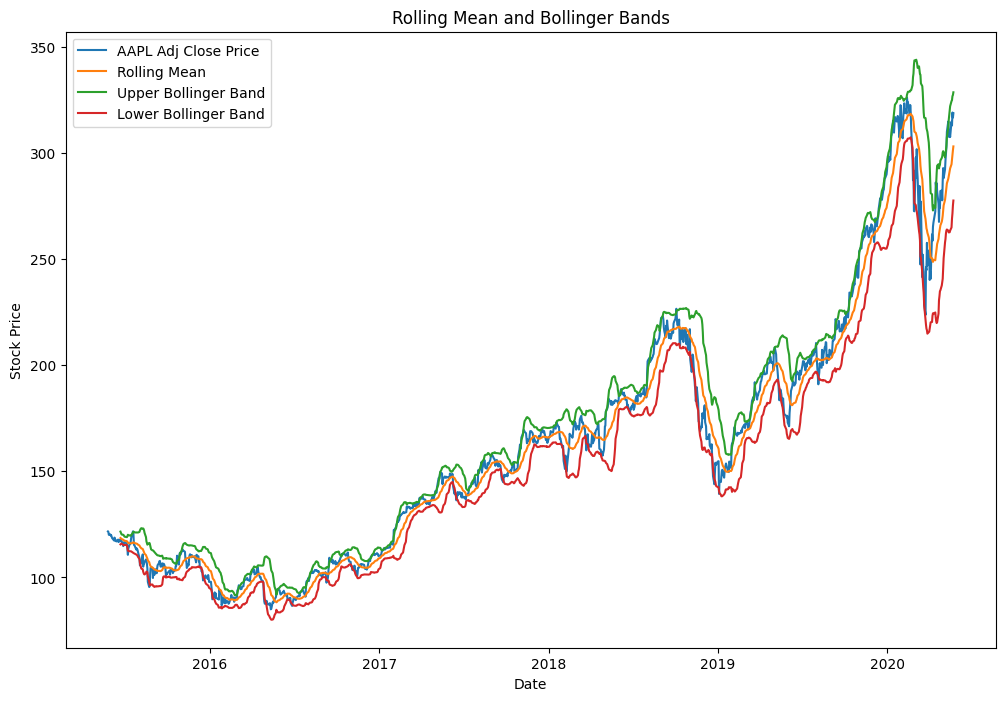

In [122]:
# Rolling Statistics and Bollinger Bands
rolling_mean = adj_close.rolling(window=20).mean()
rolling_std = adj_close.rolling(window=20).std()

plt.figure(figsize=(12, 8))
plt.plot(adj_close, label='AAPL Adj Close Price')
plt.plot(rolling_mean, label='Rolling Mean ')
plt.plot(rolling_mean + 2 * rolling_std, label='Upper Bollinger Band')
plt.plot(rolling_mean - 2 * rolling_std, label='Lower Bollinger Band')
plt.title('Rolling Mean and Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


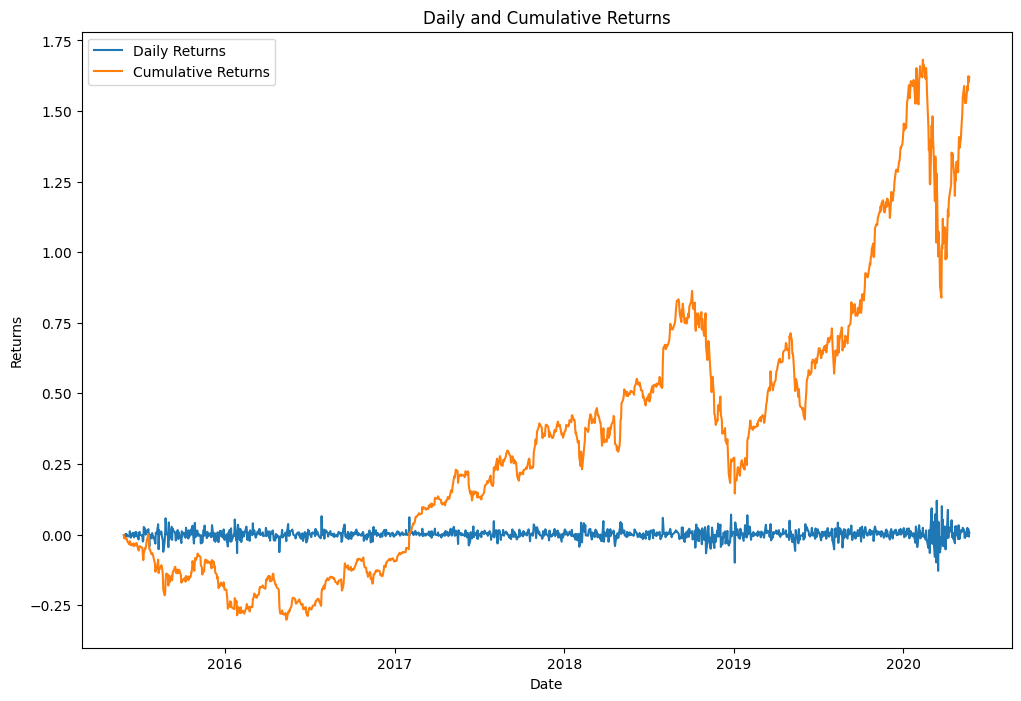

In [78]:
# Daily and Annualized Returns
daily_returns = adj_close.pct_change()
cumulative_returns = (1 + daily_returns).cumprod() - 1

plt.figure(figsize=(12, 8))
plt.plot(daily_returns, label='Daily Returns')
plt.plot(cumulative_returns, label='Cumulative Returns')
plt.title('Daily and Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()

Maximum Drawdown: -0.3852


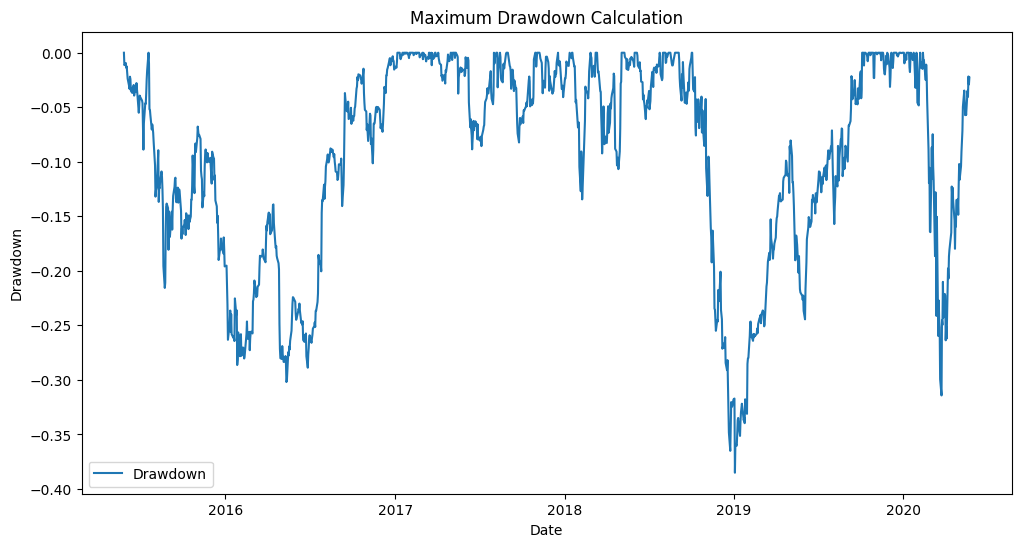

In [87]:

# Maximum Drawdown Calculation
cumulative_returns = (1 + daily_returns).cumprod()
window = 252  # 1 year
rolling_max = cumulative_returns.rolling(window=window, min_periods=1).max()
drawdown = (cumulative_returns - rolling_max) / rolling_max

max_drawdown = drawdown.min()
max_drawdown_start = drawdown.idxmin()
max_drawdown_end = cumulative_returns.loc[max_drawdown_start:].idxmax()

# Print and plot Maximum Drawdown
print(f"Maximum Drawdown: {max_drawdown:.4f}")
plt.figure(figsize=(12, 6))
plt.plot(drawdown, label='Drawdown')
plt.title('Maximum Drawdown Calculation')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.legend()
plt.show()


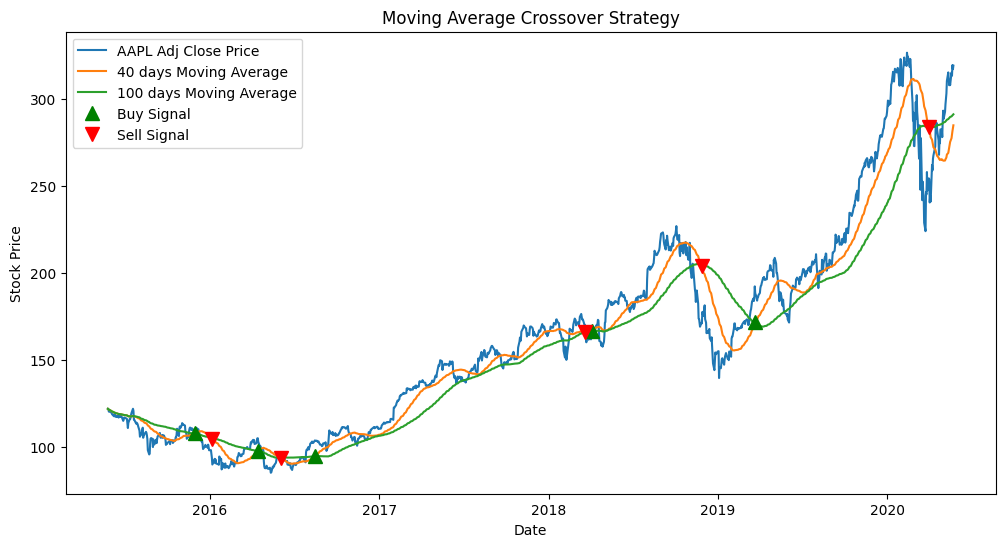

In [88]:

# Moving Average Crossover Strategy
short_window = 40
long_window = 100

signals = pd.DataFrame(index=adj_close.index)
signals['signal'] = 0.0
signals['short_mavg'] = adj_close.rolling(window=short_window, min_periods=1, center=False).mean()
signals['long_mavg'] = adj_close.rolling(window=long_window, min_periods=1, center=False).mean()

# Generate signals
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] > signals['long_mavg'][short_window:], 1.0, 0.0)

# Generate trading orders
signals['positions'] = signals['signal'].diff()

# Plot Moving Average Crossover Strategy
plt.figure(figsize=(12, 6))
plt.plot(adj_close, label='AAPL Adj Close Price')
plt.plot(signals['short_mavg'], label='40 days Moving Average')
plt.plot(signals['long_mavg'], label='100 days Moving Average')

# Plot buy signals
plt.plot(signals.loc[signals.positions == 1.0].index, signals.short_mavg[signals.positions == 1.0], '^', markersize=10, color='g', label='Buy Signal')

# Plot sell signals
plt.plot(signals.loc[signals.positions == -1.0].index, signals.short_mavg[signals.positions == -1.0], 'v', markersize=10, color='r', label='Sell Signal')

plt.title('Moving Average Crossover Strategy')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

### **ThankYou**